In [1]:
!pip install seaborn matplotlib pandas scikit-learn

# 5-4

[-1.80365297]
9.283561643835617
[[0.5]
 [0.8]
 [1.1]
 [1.5]]


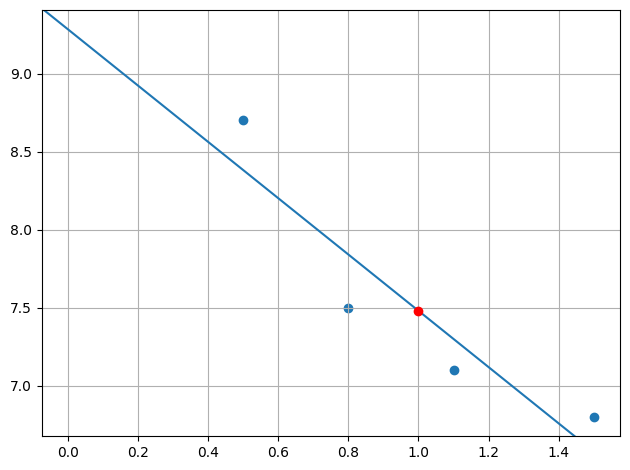

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dict_sample_data = dict(
    x = [.5, .8, 1.1, 1.5],
    y = [8.7, 7.5, 7.1, 6.8]
)

x_pre = 1

df = pd.DataFrame.from_dict(dict_sample_data)

x = df[['x']].to_numpy()
y = df['y'].to_numpy()

my_object = LinearRegression()
model = my_object.fit(x, y)

# 係数の確認
print(model.coef_)

# 切片の確認
print(model.intercept_)

y_pre = model.predict([[x_pre]])

print(x)
plt.scatter(df['x'], df['y'])
plt.axline([0, model.intercept_], slope=model.coef_[0])
plt.plot(x_pre, y_pre[0],marker='o', color='red')
plt.grid(True)
plt.tight_layout()
plt.show()    

# 相関係数の演算

                   longitude  latitude  housingMedianAge  totalRooms  \
longitude           1.000000 -0.924664         -0.108197    0.044568   
latitude           -0.924664  1.000000          0.011173   -0.036100   
housingMedianAge   -0.108197  0.011173          1.000000   -0.361262   
totalRooms          0.044568 -0.036100         -0.361262    1.000000   
totalBedrooms       0.068378 -0.066318         -0.320485    0.929893   
population          0.099773 -0.108785         -0.296244    0.857126   
households          0.055310 -0.071035         -0.302916    0.918484   
medianIncome       -0.015176 -0.079809         -0.119034    0.198050   
medianHouseValue   -0.045967 -0.144160          0.105623    0.134153   
householdRooms     -0.027540  0.106389         -0.153277    0.133798   
householdBedrooms   0.013344  0.069721         -0.077747    0.029494   

                   totalBedrooms  population  households  medianIncome  \
longitude               0.068378    0.099773    0.055310     

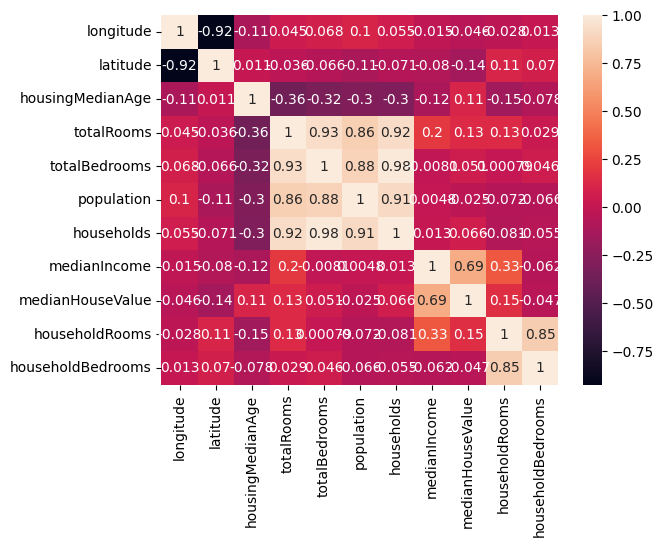

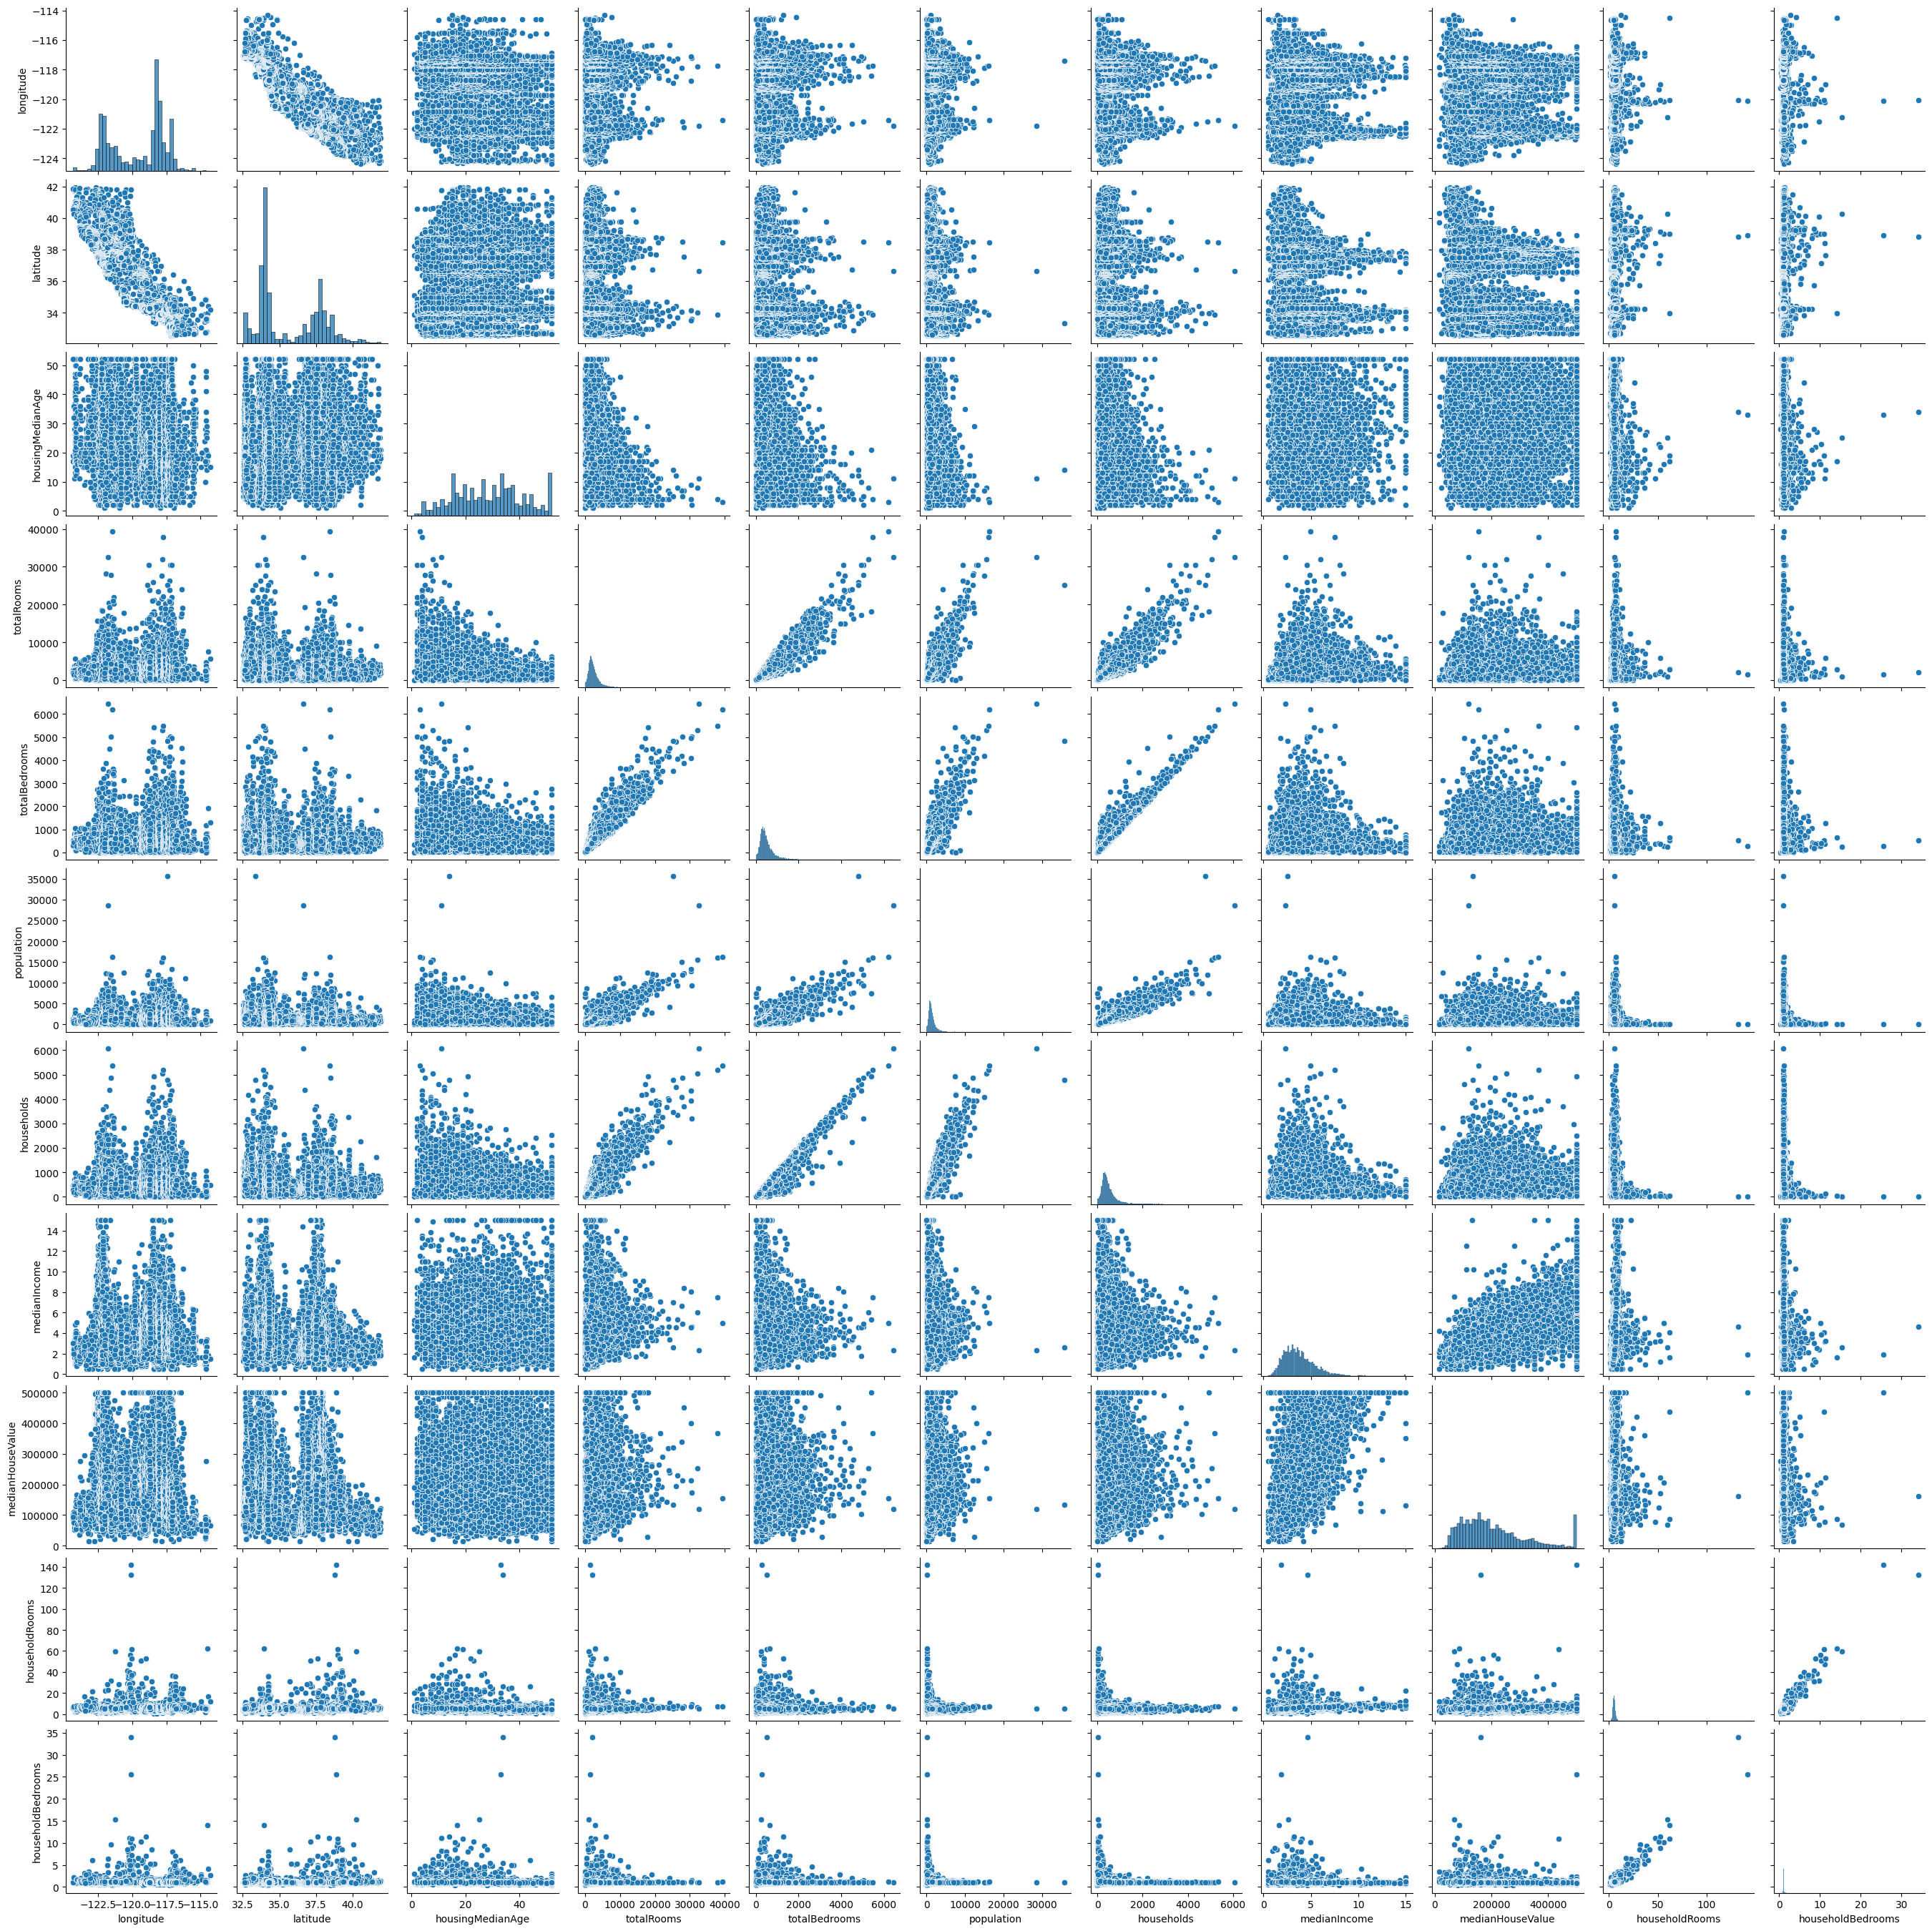

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import itertools

data_file_path = './dataset/cal_housing.data'

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']

# データフレームの列数を取得
num_columns = df.shape[1]
# 列の名前を取得
columns = df.columns

# 2つずつの組み合わせを作成
combinations = list(itertools.combinations(range(num_columns), 2))

# 相関係数
corr = df.corr()
print(corr)

seaborn.heatmap(corr, annot=True)
seaborn.pairplot(df)

# for i, (col1, col2) in enumerate(combinations):
#     plt.figure(figsize=(7, 5))
#     plt.scatter(df.iloc[:, col1], df.iloc[:, col2], marker='o', label=f'{columns[col1]} & {columns[col2]}')
#     plt.title(f'{i} {columns[col1]} & {columns[col2]} {corr.iloc[col1, col2]}')
#     plt.xlabel(f'{columns[col1]}')
#     plt.ylabel(f'{columns[col2]}')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
    
#     # 画像を保存
#     plt.savefig(f'plot/{i}_{columns[col1]}_&_{columns[col2]}.png')
#     plt.close()

# print('save finish')

# 価格 -> 収入 (単回帰)

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data_file_path = './dataset/cal_housing.data'
x_pre = [[200000]]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']

x = df[['medianHouseValue']].to_numpy()
y = df['medianIncome'].to_numpy()

print(x)
print(y)

my_object = LinearRegression()
model = my_object.fit(x, y)

# 係数の確認
print('係数', model.coef_)
# 切片の確認
print('切片', model.intercept_)

y_pre = model.predict(x_pre)

print('pre', y_pre) 

[[452600.]
 [358500.]
 [352100.]
 ...
 [ 92300.]
 [ 84700.]
 [ 89400.]]
[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
係数 [1.13281619e-05]
切片 1.5273748109685226
pre [3.7930072]


## 価格 -> 収入 (単回帰 | ライブラリ無し)

In [51]:
x = df[['medianHouseValue', 'medianIncome']]

cov = x.cov()
var = x.var()
mean = x.mean()

print(cov)
print(var)

A = cov.medianHouseValue.medianIncome / var.medianHouseValue
B = mean.medianIncome - A * mean.medianHouseValue
print("傾き", A)
print("切片", B)

                  medianHouseValue   medianIncome
medianHouseValue      1.331615e+10  150847.482793
medianIncome          1.508475e+05       3.609323
medianHouseValue    1.331615e+10
medianIncome        3.609323e+00
dtype: float64
傾き 1.1328161938855784e-05
切片 1.527374810968488


# 重回帰

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data_file_path = './dataset/cal_housing.data'
x_pre = [[30, 5, 1, 3, 400000]]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']


x = df[['housingMedianAge','householdRooms','householdBedrooms','householdPopulation','medianHouseValue']].to_numpy()
y = df['medianIncome'].to_numpy()

my_object = LinearRegression()
model = my_object.fit(x, y)

# 係数の確認
print('係数', model.coef_)
# 切片の確認
print('切片', model.intercept_)

y_pre = model.predict(x_pre)

print('pre', y_pre) 

[[4.10000000e+01 6.98412698e+00 1.02380952e+00 2.55555556e+00
  4.52600000e+05]
 [2.10000000e+01 6.23813708e+00 9.71880492e-01 2.10984183e+00
  3.58500000e+05]
 [5.20000000e+01 8.28813559e+00 1.07344633e+00 2.80225989e+00
  3.52100000e+05]
 ...
 [1.70000000e+01 5.20554273e+00 1.12009238e+00 2.32563510e+00
  9.23000000e+04]
 [1.80000000e+01 5.32951289e+00 1.17191977e+00 2.12320917e+00
  8.47000000e+04]
 [1.60000000e+01 5.25471698e+00 1.16226415e+00 2.61698113e+00
  8.94000000e+04]]
[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
係数 [-1.38724274e-02  7.46535240e-01 -3.48463973e+00  5.74993274e-03
  8.39979901e-06]
切片 2.281345019326924
pre [5.49037807]


## L1

In [69]:
import pandas as pd
from sklearn.linear_model import Lasso

data_file_path = './dataset/cal_housing.data'
x_pre = [[30, 5, 1, 3, 400000]]
alphas = [0.1, 1.0, 10.0]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

x = df[['housingMedianAge','householdRooms','householdBedrooms','householdPopulation','medianHouseValue']].to_numpy()
y = df['medianIncome'].to_numpy()


for alpha in alphas:
    my_object = Lasso(alpha=alpha)
    model = my_object.fit(x, y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    y_pre = model.predict(x_pre)

    print('pre', y_pre) 

----- alpha 0.1 -------
係数 [-2.00888922e-02  3.67432962e-01 -1.35511732e+00  5.53687910e-03
  1.01144465e-05]
切片 1.8281026522439148
pre [5.76987261]
----- alpha 1.0 -------
係数 [-2.28808387e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.15916686e-05]
切片 2.128162404527358
pre [6.07840467]
----- alpha 10.0 -------
係数 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.13274109e-05]
切片 1.5275301605763092
pre [6.05849453]


## L2

In [70]:
import pandas as pd
from sklearn.linear_model import Ridge

data_file_path = './dataset/cal_housing.data'
x_pre = [[30, 5, 1, 3, 400000]]
alphas = [0.1, 1.0, 10.0]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

x = df[['housingMedianAge','householdRooms','householdBedrooms','householdPopulation','medianHouseValue']].to_numpy()
y = df['medianIncome'].to_numpy()


for alpha in alphas:
    my_object = Ridge(alpha=alpha)
    model = my_object.fit(x, y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    y_pre = model.predict(x_pre)

    print('pre', y_pre) 

----- alpha 0.1 -------
係数 [-1.38733932e-02  7.46480284e-01 -3.48432048e+00  5.75004080e-03
  8.40005064e-06]
切片 2.2812685472189678
pre [5.49041807]
----- alpha 1.0 -------
係数 [-1.38820774e-02  7.45986132e-01 -3.48144992e+00  5.75101244e-03
  8.40231320e-06]
切片 2.2805809293200365
pre [5.49077766]
----- alpha 10.0 -------
係数 [-1.39681467e-02  7.41088622e-01 -3.45300053e+00  5.76064192e-03
  8.42473717e-06]
切片 2.273766653849938
pre [5.49434162]


# test

In [65]:
import sympy

dict_sample_data = dict(
    x = [2, 4, 9],
    y = [3, 7, 11]
)

x = pd.DataFrame.from_dict(dict_sample_data)

cov = x.cov()
var = x.x.var()
mean = x.mean()

x_x = sympy.Symbol('x')
y_y = sympy.Symbol('y')

equ1 = 8*x_x + 7.8*y_y - 60.2
equ2 = 8.7*y_y + 7.8*x_x - 56.72

print('equ', sympy.solve([equ1, equ2]))

print(corr)
print(var)

tes = var

A = cov.x.y / tes
B = mean.y - A * mean.x
print("傾き", A)
print("切片", B)

equ {x: 9.28356164383562, y: -1.80365296803653}
          x         y
x  1.000000  0.970725
y  0.970725  1.000000
13.0
傾き 1.0769230769230769
切片 1.6153846153846159
